In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
xlis = []
ylis = []
flis = [] 
wlis = []

# Dataset 만들기

In [5]:
R=10
size=1
weights={}
#data_set={}    
loss_grad={}    # dJdW, dJdB 저장공간
forward_info={} # 순방향 저장공간
batch={}

W= np.random.uniform(-R,R,size=size)
b= np.random.uniform(-R,R,size=1)

for i in range(1000):
    x = np.random.uniform(-R,R,size=size)
    y = np.random.normal(W*x+b,1,size=size)
    xlis.append(x)
    ylis.append(y)
    flis.append(W*x+b)

x=np.array(xlis)
y=np.array(ylis)

weights['W']=W
weights['B']=b

result=np.concatenate((x,y),axis=1)

train_idx=int(result.shape[0]*0.85)
dev_idx=int(result.shape[0]*0.05)
test_idx=int(result.shape[0]*0.1)

train_data_set=result[0:train_idx,:]
test_data_set=result[train_idx:train_idx+test_idx,:]
dev_data_set=result[train_idx+test_idx:train_idx+test_idx+dev_idx,:]

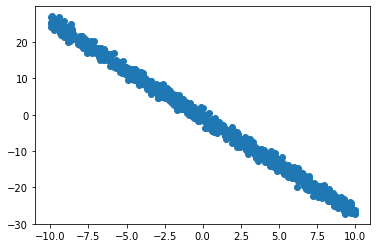

In [6]:
plt.scatter(xlis,ylis)

In [7]:
print(W)
print(b)

[-2.61725743]
[-0.71854169]


In [8]:
data=train_data_set
idx=train_idx
minibatch_size=1
data=np.random.permutation(data)

#epoch
print(data.shape)
X_batch= data[:,0]
print(X_batch.shape)
y_batch= data[:,1]
X_batch=np.reshape(X_batch,(idx,size))
y_batch=np.reshape(y_batch,(idx,size))

print(X_batch.shape)

number_minibatch= np.int(np.ceil(X_batch.shape[0]/minibatch_size))

#iteration
# i=1
# X_batch_temp=X_batch[minibatch_size*i-(minibatch_size-1)-1:minibatch_size*i]
# y_temp=y_batch[minibatch_size*i-(minibatch_size-1)-1:minibatch_size*i]

(850, 2)
(850,)
(850, 1)


In [8]:
class Model():
    def __init__(self): #초깃값 설정해야 할 때
        self.W=np.random.uniform(-R,R,size=size)
        self.b=np.random.uniform(-R,R,size=1)
        self.N=0
        self.f=0
        self.loss=0
        self.w_grad=np.zeros(size)
        self.b_grad=np.zeros(1)
        
    def forward(self,x,y):
        print('W')
        print(self.W)
        
        print('b')
        print(self.b)
        self.N = self.W*x
        self.f = self.N+self.b
        self.loss=np.mean(np.power(y-self.f,2))
        
#         print('w',self.W.shape)
#         print(self.b.shape)
#         print(x.shape)
#         print(y.shape)
#         print(self.N.shape)
#         print(self.f.shape)
#         print('loss',self.loss.shape)
        
        return self.loss
    
    def backward(self,x,y):
        batch_size=x.shape[0]
        dJdf = 2*(self.f-y)/batch_size
        #print(dJdf)
        dfdN=np.ones_like(self.N) 
        #print('dfdN',dfdN)
        dfdB=np.ones_like(self.N)
        #print(dfdB)
        
        dJdN=dJdf*dfdN
#         print('dJdN',dJdN.shape)
        #print(dJdN)
        dNdW=np.transpose(x,(1,0))
        #print(dNdW)
        dJdW=np.dot(dNdW, dJdN)
#         print(dJdW.shape)
        #print(dJdW)
        dJdB=(dJdf*dfdB).sum(axis=0)
        #print(dJdB)
        self.w_grad=dJdW
        self.b_grad=dJdB

#         dJdW=2*(self.f-y)/batch_size*x
#         dJdb=2*(self.f-y)/batch_size
#         self.w_grad=sum(dJdW)
#         self.b_grad=sum(dJdb)

        self.W=self.W - 0.001 * self.w_grad
        self.b=self.b - 0.001 * self.b_grad

In [9]:
R=10
size=1
weights={}
#data_set={}    
loss_grad={}    # dJdW, dJdB 저장공간
forward_info={} # 순방향 저장공간
batch={}
model=Model()
print(model.W)
print(model.b)
print(model.b_grad)
for i in range(1000):
    x = np.random.uniform(-R,R,size=size)
    y = np.random.normal(model.W*x+model.b,1,size=size)
    xlis.append(x)
    ylis.append(y)
    flis.append(model.W*x+model.b)

x=np.array(xlis)
y=np.array(ylis)
model.forward(x,y)

[-6.47496619]
[-9.19373943]
[0.]
W
[-6.47496619]
b
[-9.19373943]


48.878636292285975

In [81]:
for j in range(1,10+1):
    print('*************',j,'번차 epoch *************')
    data=np.random.permutation(data)
    X_batch= data[:,0]
    y_batch= data[:,1]
    X_batch=np.reshape(X_batch,(idx,size))
    y_batch=np.reshape(y_batch,(idx,size))

    number_minibatch= np.int(np.ceil(X_batch.shape[0]/minibatch_size))
    
    avglo=0
    for i in range(1,number_minibatch+1):
        X_batch_temp=X_batch[minibatch_size*i-(minibatch_size-1)-1:minibatch_size*i]
        y_temp=y_batch[minibatch_size*i-(minibatch_size-1)-1:minibatch_size*i]
        loss=model.forward(X_batch_temp,y_temp)
        avglo+=loss
        if i % 100 ==0:
            print(loss,'\t',avglo/(i))
            #avglo=0
        model.backward(X_batch_temp,y_temp)
        # print(model.w_grad)
        # print(model.b_grad)
    #     print(model.W)
    #     print(model.b)

************* 1 번차 epoch *************
0.0004892759115479702 	 13.375001751670126
3.7932003048908065 	 10.127096803686623
7.120517958921674 	 8.393168985510124
14.812482914196194 	 7.184110648276089
2.267351193447741 	 6.301492307352047
0.06514102127675449 	 5.673266404400896
0.38941899924603246 	 5.11903358539437
2.649766252886864 	 4.692745221464606
************* 2 번차 epoch *************
5.165448593569632 	 1.3666624788843604
3.1103042312745615 	 1.3393848648838889
0.001795681007026583 	 1.2495986718766456
0.12775115938430961 	 1.262502689867242
1.7911283645229281 	 1.245364661137218
0.09908667528057707 	 1.2285680481495287
0.11334011521420376 	 1.2024633906953381
0.05752905630536603 	 1.1896303308430283
************* 3 번차 epoch *************
0.02765777136771625 	 1.2099327101990949
1.7175791032480139 	 1.0699130195149718
0.3114259777613636 	 1.0200180230362328
0.090265088452497 	 0.9989735365076572
0.1831584471548307 	 1.0134403110447021
0.11058407828739622 	 1.0605835271824284
1.83

In [54]:
def linear_regression(data,idx,minibatch_size, epoch_size):
    global W
    global b
    dat_list=[]
#     X_batch= data[:,0]
#     y_batch= data[:,1]
#     X_batch=np.reshape(X_batch,(idx,size))
#     y_batch=np.reshape(y_batch,(idx,size))

    number_minibatch= np.int(np.ceil(data.shape[0]/minibatch_size))
#     W=np.random.uniform(-R,R,size=size)
#     b=np.random.uniform(-R,R,size=1)
    
    for j in range(1,epoch_size+1):
        print('*************',j,'번차 epoch *************')
        data=np.random.permutation(data)
        X_batch= data[:,0]
        y_batch= data[:,1]
        X_batch=np.reshape(X_batch,(idx,size))
        y_batch=np.reshape(y_batch,(idx,size))
        
        number_minibatch= np.int(np.ceil(X_batch.shape[0]/minibatch_size))
    
    #    assert X_batch.shape[0] == y_batch.shape[0]
    #    assert X_batch.shape[1] == weights['W'].shape[0]
        
        for i in range(1, number_minibatch+1):
            X_batch_temp=X_batch[minibatch_size*i-(minibatch_size-1)-1:minibatch_size*i]
            y_temp=y_batch[minibatch_size*i-(minibatch_size-1)-1:minibatch_size*i]
            
            N=W*X_batch_temp
            f= N+b
            loss=np.mean(np.power(y_temp-f,2))
            if i==1:
                print('loss',loss)
            forward_info['X']= X_batch_temp
            forward_info['N']= N       # 
            forward_info['f']= f       # 예측값
            forward_info['y']= y_temp # 실제값

            # 전체코드로 본 도함수 계산과정
            batch_size=forward_info['X'].shape[0]
            dJdf=-2*(forward_info['y']-forward_info['f'])
            dfdN=np.ones_like(forward_info['N']) 
            dfdB=np.ones_like(forward_info['N'])
            dJdN=dJdf*dfdN 
            dNdW=np.transpose(forward_info['X'],(1,0))

            dJdW=np.dot(dNdW, dJdN)
            dLdB=(dJdf*dfdB).sum(axis=0)

            loss_grad['W']=dJdW
            loss_grad['B']=dLdB

#             for key in weights.keys():
#                 weights[key]=weights[key]- 0.00001 * loss_grad[key]
            W=W - 0.00001 * loss_grad['W']
            b=b - 0.00001 * loss_grad['B']
        N=W*X_batch
        f= N+b
        loss=np.mean(np.power(y_batch-f,2))
        print('Loss',loss)
      
        print('=================================')
        

        

In [80]:
print('Train_data')
linear_regression(train_data_set,train_idx,20,30)

# print('\ndev_data')
# linear_regression(dev_data_set,dev_idx,20,30)

# print('\nTest_data')
# linear_regression(test_data_set,test_idx,20,30)

Train_data
************* 1 번차 epoch *************
loss 1.0233416278338576
Loss 0.9882879332784041
************* 2 번차 epoch *************
loss 1.5451502438276683
Loss 0.9873357327667032
************* 3 번차 epoch *************
loss 1.418639155198556
Loss 0.9869866452882351
************* 4 번차 epoch *************
loss 1.1491791136524265
Loss 0.986984066069048
************* 5 번차 epoch *************
loss 0.39157975952536495
Loss 0.9869806865020484
************* 6 번차 epoch *************
loss 0.8882260005107062
Loss 0.9869509127034225
************* 7 번차 epoch *************
loss 0.5494115320689925
Loss 0.986959271268826
************* 8 번차 epoch *************
loss 0.5201336393579441
Loss 0.9869582606689452
************* 9 번차 epoch *************
loss 1.06729614104604
Loss 0.9869490022939055
************* 10 번차 epoch *************
loss 1.2747636681136876
Loss 0.986950402453556
************* 11 번차 epoch *************
loss 1.4151873240730999
Loss 0.9869489906361721
************* 12 번차 epoch *********